In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from itertools import product

In [4]:
from commons import smoothen

In [5]:
fontsize = 14

# Preparations

## Loading the data

Let's start by loading the growth curves $N_i(t)$ :

In [6]:
Nt = smoothen(np.load("curves_raw.npy"), 10)

Now let's calculate the derivatives $\frac{\Delta N_i}{\Delta t}(t) = \Delta N_i(t)$ and relative growth rates $\rho_i(t) = \frac{\Delta N_i}{N_i}(t)$ :

In [7]:
dNdt = Nt[..., 1:] - Nt[..., :-1]

In [8]:
rho = dNdt / Nt[..., :-1]

For convenience, let's store the dimensions of $\rho_i(t)$ :

In [9]:
n_plates, n_rows, n_columns, n_points = rho.shape
plates, rows, columns, points = map(np.arange, rho.shape)

We will also need the growth and maintenance terms $\nu_1$ and $\nu_2$ :

In [10]:
params = pd.read_csv("diffusion-parameters/optimal.csv")

# Figure

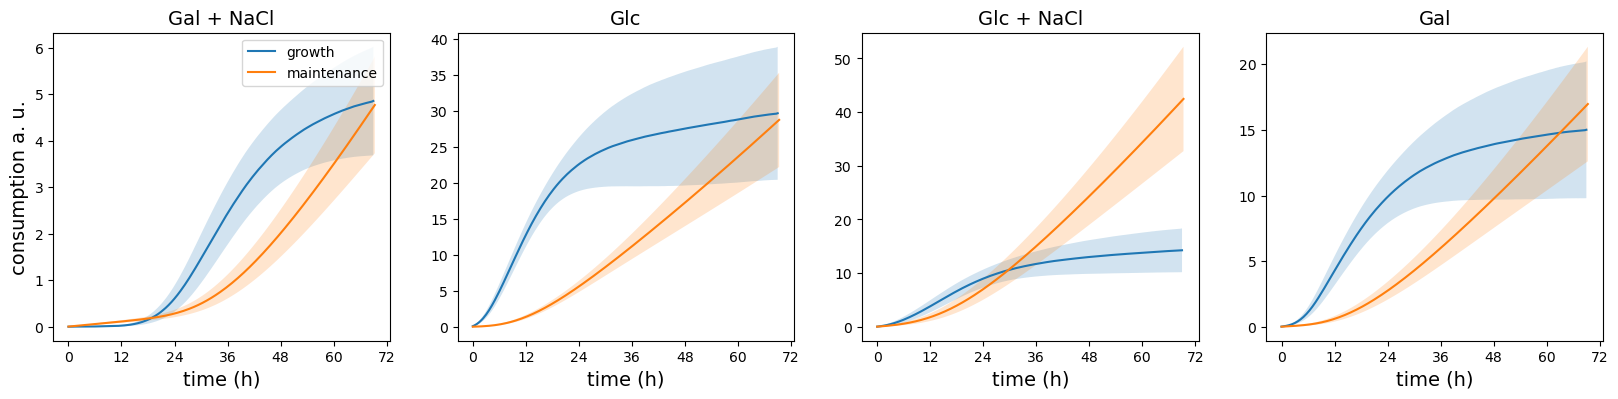

In [11]:
fig, axes = plt.subplots(ncols = 4, figsize = (20, 4))

titles = ("Gal + NaCl", "Glc", "Glc + NaCl", "Gal")
for p, ax in enumerate(axes):
    nu1, nu2 = params.loc[p, ["nu1", "nu2"]]
    nt = Nt[p].reshape((-1, n_points+1)).cumsum(axis = 1).mean(axis = 0)
    stdnt = Nt[p].reshape((-1, n_points+1)).cumsum(axis = 1).std(axis = 0)
    dndt = dNdt[p].reshape((-1, n_points)).cumsum(axis = 1).mean(axis = 0)
    stddndt = dNdt[p].reshape((-1, n_points)).cumsum(axis = 1).std(axis = 0)
    
#    ax.plot(nu1 * dNdt[p, 16, 16].cumsum(), label = "growth")
#    ax.plot(nu2 * Nt[p, 16, 16].cumsum(), label = "maintenance")
    ax.plot(nu1 * dndt, label = "growth")
    ax.fill_between(x = points, y1 = nu1 * (dndt-stddndt), y2 = nu1 * (dndt+stddndt), alpha = 0.2)
    ax.plot(nu2 * nt, label = "maintenance")
    ax.fill_between(x = np.arange(n_points+1), y1 = nu2 * (nt-stdnt), y2 = nu2 * (nt+stdnt), alpha = 0.2)
    ax.set_xlabel("time (h)", fontsize = fontsize)
    ax.set_xticks([0, 36, 72, 108, 144, 180, 216], labels = [0, 12, 24, 36, 48, 60, 72])
    ax.set_title(titles[p], fontsize = fontsize)
axes[0].set_ylabel("consumption a. u.", fontsize = fontsize)
axes[0].legend()

fig.savefig(f"plots/figure-4/consumption.pdf", bbox_inches = "tight")
fig.savefig(f"plots/figure-4/consumption.png", bbox_inches = "tight");